Analyzing treesequence output from SLiM


In [2]:
import msprime, tskit, pyslim, time 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
ts1 =  tskit.load("../steps/slim_tree_seqs/A_3__N_1000__u_0.0000050000__r_0.0000000005__S_200_0.trees")
ts2 = tskit.load("../steps/slim_tree_seqs/A_3__N_1000__u_0.0000050000__r_0.0000000005__S_20_0.trees")

In [6]:
def TajimasD(ts_list, windows_len=1800):   
    if type(ts_list) == tskit.trees.TreeSequence:
        L = int(ts_list.sequence_length)
        windows = np.linspace(0, L, L//windows_len)
        plt.stairs(ts_list.Tajimas_D(windows=windows), windows/1_000, baseline=None)  # Default is mode="site"
        plt.title("Tajima's D")
        plt.xlabel("Genome position (kb)")
        plt.ylabel("D")
        plt.show()
    elif type(ts_list) == list:
        for ts in ts_list:
            L = int(ts.sequence_length)
            windows = np.linspace(0, L, L//windows_len)
            plt.stairs(ts.Tajimas_D(windows=windows), windows/1_000, baseline=None)
        plt.xlabel("Genome position (kb)")
        plt.ylabel("D")
        plt.show()
    return 0 

def Tmrca(ts_list):
    #Plotting TMRCA for given tree sequence 
    if type(ts_list) == tskit.trees.TreeSequence:      
        #filtering trees with more than one branch 
        trees_onebranch = [tree for tree in ts_list.trees() if len(tree.roots) == 1]
        tmrca = np.zeros(len(trees_onebranch)) #initializing lists
        breakpoints = np.zeros(len(trees_onebranch))
        for tree in ts_list.trees():
            if len(tree.roots) == 1:
                tmrca[tree.index] = tree.time(tree.root)
                breakpoints[tree.index] = tree.interval[0]     #t[0] + (t[1] + t[0] / 2)
            plt.plot(breakpoints / 1000, tmrca, "o")
        plt.ylabel("T_mrca (Generations)")
        plt.xlabel("Position (kb)")
        plt.show()
    elif type(ts_list) == list:
        for ts in ts_list:
            trees_onebranch = [tree for tree in ts.trees() if len(tree.roots) == 1]
            tmrca = np.zeros(len(trees_onebranch)) #initializing lists
            breakpoints = np.zeros(len(trees_onebranch))
            for tree in ts.trees():
                if len(tree.roots) == 1:
                    tmrca[tree.index] = tree.time(tree.root)
                    breakpoints[tree.index] = tree.interval[0]
                    #t[0] + (t[1] + t[0] / 2)
            plt.plot(breakpoints / 1000, tmrca, "o")
        plt.ylabel("T_mrca (Generations)")
        plt.xlabel("Position (kb)")
        plt.show()
    return 0

In [18]:
def ts_visualizer(ts_list, startpos, endpos):
    
    Tmrca(ts_list)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))
    """ for ts in ts_list:
        L = int(ts.sequence_length)
        windows = np.linspace(0, L, num=L//500)
        ax1.stairs(ts.diversity(windows=windows), windows/1_000, baseline=None)  # Default is mode="site"
        ax1.set_title("Site-based calculation")
        #ax1.set_xlim(4e3, 6e3)
        ax1.set_yscale("log")
        #ax1.set_ylim(1e-6, 1e-2)
        ax2.stairs(ts.diversity(windows=windows, mode="branch"), windows/1_000, baseline=None)
        #ax2.set_xlim(4e3, 6e3)
        ax2.set_yscale("log")
        ax1.set_ylabel("Diversity")
        ax1.set_xlabel("Genome position (kb)")
        ax2.set_xlabel("Genome position (kb)")
        ax2.set_title("Branch-length-based calculation")
    plt.show() """

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))
    """ for ts in ts_list:
        afs1 = ts.allele_frequency_spectrum(polarised=True, mode="branch")
        ax1.bar(np.arange(ts.num_samples+1), afs1)
        ax1.set_title("Genome-wide branch-length AFS")
        restricted_ts = ts.keep_intervals([[startpos, endpos]])
        afs2 = restricted_ts.allele_frequency_spectrum(polarised=True, mode="branch")
        ax2.bar(np.arange(restricted_ts.num_samples+1), afs2)
        ax2.set_title(f"Branch-length AFS between {startpos} and {endpos}")
    plt.show()
    """
    
    TajimasD(ts_list) 
    '''
        afs = ts.allele_frequency_spectrum()
        plt.bar(np.arange(ts.num_samples + 1), afs)
        plt.title("Unpolarised allele frequency spectrum")
        plt.show()

    '''
    return 0

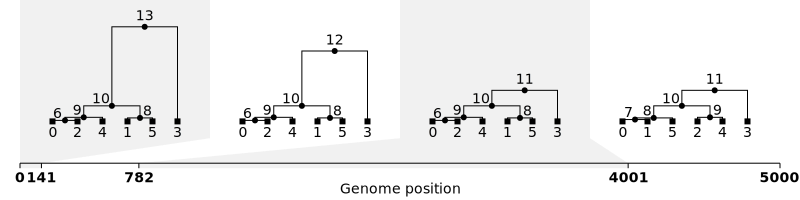

In [9]:
import msprime
from IPython.display import SVG, display

# Simulate an ancestral history for 3 diploid samples under the coalescent
# with recombination on a 5kb region with human-like parameters.
ts1 = msprime.sim_ancestry(
samples=3,
recombination_rate=1e-8,
sequence_length=5_000,
population_size=10_000,
random_seed=123456)
# Visualise the simulated ancestral history.
SVG(ts1.draw_svg())

In [13]:
n_windows = 5
ts2.Tajimas_D(windows=np.linspace(0, ts2.sequence_length, n_windows + 1))

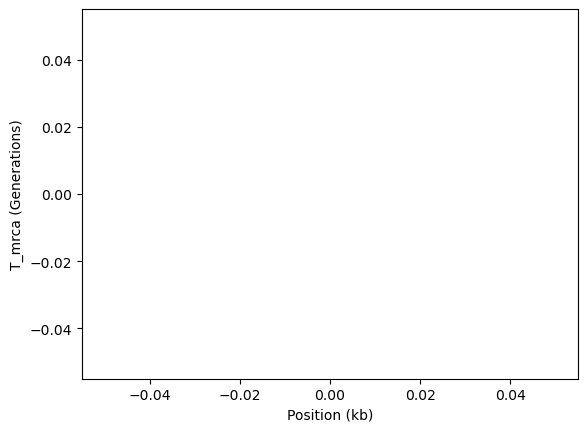

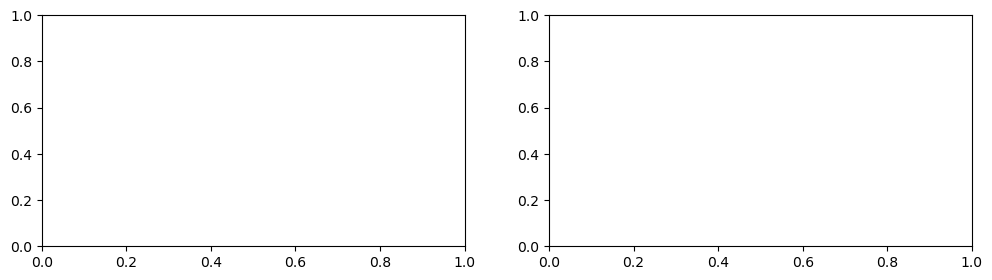

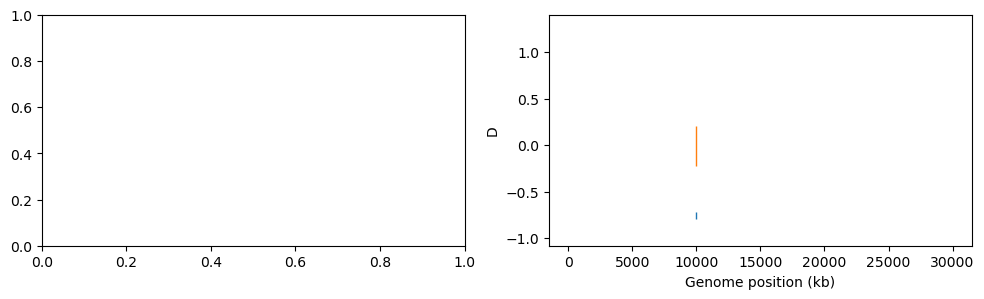

0

In [19]:
ts_visualizer([ts1, ts2], 0, 1000)

In [ ]:
def ts_analyzer(ts_list):
    pass

Tree number 1, which runs from position 10000.0 to 10001.0:


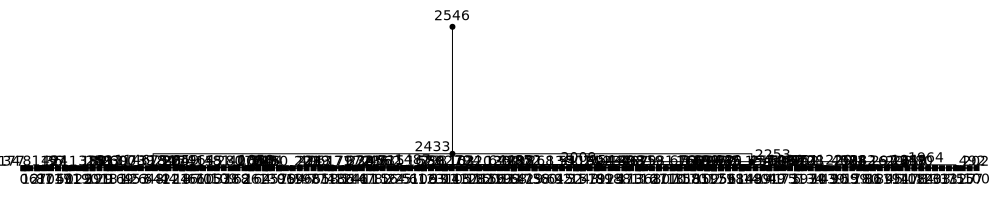

In [23]:
swept_tree = ts.at(10_000)  # or you can get e.g. the nth tree using ts.at_index(n)
intvl = swept_tree.interval
print(f"Tree number {swept_tree.index}, which runs from position {intvl.left} to {intvl.right}:")
# Draw it at a wide size, to make room for all 40 tips
swept_tree.draw_svg(size=(1000, 200))

Genealogy of the first 10 samples for the first 5kb of the genome


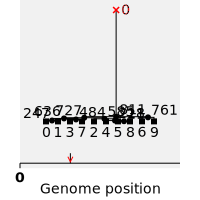

In [24]:
reduced_ts = ts.simplify([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # simplify to the first 10 samples
print("Genealogy of the first 10 samples for the first 5kb of the genome")
reduced_ts.draw_svg(x_lim=(0, 5000))

In [28]:
d = ts.diversity()
print(f"Average diversity per unit sequence length = {d:.3G}")

Average diversity per unit sequence length = 0.000345


In [29]:
windows = np.linspace(0, ts.sequence_length, num=5)
d = ts.diversity(windows=windows)
print(windows, d, sep="\n")

[    0.  7502. 15004. 22506. 30008.]
[0.         0.         0.00032951 0.00105048]
